<a href="https://colab.research.google.com/github/jeremymolina/ulead-2023-lll-BCD3103/blob/main/CNN_jeremy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5332 - accuracy: 0.4396 - val_loss: 1.3410 - val_accuracy: 0.5182
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1967 - accuracy: 0.5746 - val_loss: 1.1221 - val_accuracy: 0.6026
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0566 - accuracy: 0.6272 - val_loss: 1.0172 - val_accuracy: 0.6399
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9574 - accuracy: 0.6632 - val_loss: 0.9649 - val_accuracy: 0.6638
Epoch 5/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.8850 - accuracy: 0.6902 - val_loss: 0.9714 - val_accuracy: 0.6647
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8275 - accuracy: 0.7076 - val_loss: 0.8813 - val_accuracy: 0.6925
Epoch 7/10
1563/1563 [==============================] - 6

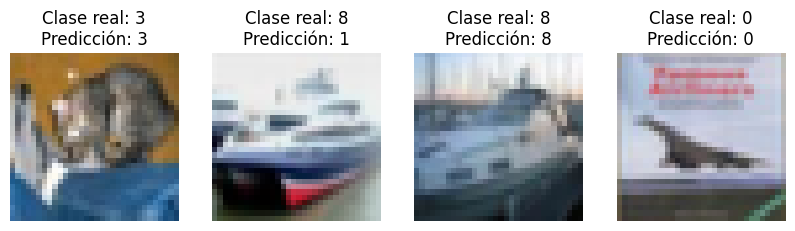

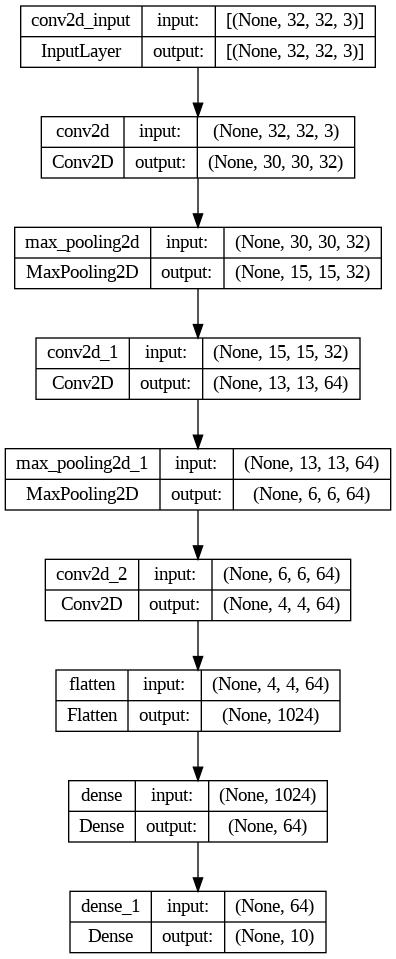

In [1]:
#importar las librerias necesarias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Cargar el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar los valores de px al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# 1. Definir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Basado en la recomendacion de profe
])

# 2. Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Entrenar el modelo
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# 4. Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Accuracy: {test_acc}")

# 5. Hacer predicciones y visualizar ejemplo.
predictions = model.predict(test_images)

# 6. Jugar con el modelo, capas e hiperparametros en busca del mejor resultado
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(test_images[i])
    plt.title(f'Clase real: {test_labels[i][0]}\nPredicción: {predictions[i].argmax()}')
    plt.axis('off')
plt.show()

# 7. Generar/Guardar grafico de la arquitectura del modelo
tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)
